# Average with mean sales per month ensemble

Let's first plot the sales per month in the 2 years, and see if in different years in average the shops all together sell the same amount of stuff. Also, it is necessary to understand whether most of the shop behave in the same way, outliers shops which could sell a lot one month and next year in the same month they sell much less could be problematic in this type of ensemble given our error function.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
dataset = pd.read_csv('./dataset/preprocessed0_date_train.csv')

In [40]:
#dataset['Date'] = pd.to_datetime(dataset['Date'], errors='coerce')
#dataset['D_Month'] =  dataset['Date'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y').month)

In [36]:
print(dataset.D_Month.unique())

[ 3  4  5  6  7  8  9 10 11 12  1  2]


In [47]:
#dataset.sort_values(by='Date')
#dataset.sort_values(['StoreID', 'Date'])  sorting by date dows not work

Getting first 12 months

In [50]:
first=dataset.loc[((dataset['D_Month'] >= 3) & (dataset['D_Year'] == 2016)) |\
                  ((dataset['D_Month'] < 3) & (dataset['D_Year'] == 2017))]

In [55]:
second = dataset.loc[((dataset['D_Month'] >= 3) & (dataset['D_Year'] == 2017)) |\
                  ((dataset['D_Month'] < 3) & (dataset['D_Year'] == 2018))]

In [38]:
dataset.shape

(523021, 40)

In [51]:
first.shape

(272636, 40)

In [56]:
second.shape

(250385, 40)

In [59]:
aggregation_dict = {'NumberOfSales':sum,      # find the sum of the sales of the group
                    'NumberOfCustomers':sum,
                    'StoreID':"count"}
firstbymonth = first.groupby('D_Month').agg(aggregation_dict)
firstbymonth = firstbymonth.reset_index()
firstbymonth.rename(columns={'StoreID:': 'Open_stores'}, inplace=True)

In [60]:
aggregation_dict = {'NumberOfSales':sum,      # find the sum of the sales of the group
                    'NumberOfCustomers':sum,
                    'StoreID':"count"}
secondbymonth = second.groupby('D_Month').agg(aggregation_dict)
secondbymonth = secondbymonth.reset_index()
secondbymonth.rename(columns={'StoreID:': 'Open_stores'}, inplace=True)

Same normalization I did on week has to be applied here

In [61]:
firstbymonth

,D_Month,NumberOfSales,NumberOfCustomers,StoreID
0,1,86136904,5538571,23219
1,2,84376836,5442662,20972
2,3,97388599,6178965,22470
3,4,82045477,5465175,22470
4,5,86880572,5618039,23219
5,6,89954151,5842857,22470
6,7,91060441,5883092,23219
7,8,97849526,6276168,23219
8,9,88829457,5831557,22470
9,10,86026240,5644232,23219


In [62]:
secondbymonth

,D_Month,NumberOfSales,NumberOfCustomers,StoreID
0,1,90594142,5633577,22844
1,2,85169759,5348447,20972
2,3,91610754,6000001,23219
3,4,85759494,5481432,22470
4,5,98267775,6205425,23219
5,6,88219584,5592930,22470
6,7,80106109,5133068,19719
7,8,81388045,5273644,19344
8,9,74374393,4961224,18720
9,10,76627984,4985677,19344


In [63]:
firstbymonth['Sales_per_store']=firstbymonth['NumberOfSales']/firstbymonth['StoreID']
firstbymonth.head(12)

,D_Month,NumberOfSales,NumberOfCustomers,StoreID,Sales_per_store
0,1,86136904,5538571,23219,3709.759421
1,2,84376836,5442662,20972,4023.308983
2,3,97388599,6178965,22470,4334.161059
3,4,82045477,5465175,22470,3651.334090
4,5,86880572,5618039,23219,3741.787846
5,6,89954151,5842857,22470,4003.300000
6,7,91060441,5883092,23219,3921.807184
7,8,97849526,6276168,23219,4214.200698
8,9,88829457,5831557,22470,3953.246862
9,10,86026240,5644232,23219,3704.993324


In [64]:
secondbymonth['Sales_per_store']=secondbymonth['NumberOfSales']/secondbymonth['StoreID']
secondbymonth.head(12)

,D_Month,NumberOfSales,NumberOfCustomers,StoreID,Sales_per_store
0,1,90594142,5633577,22844,3965.774033
1,2,85169759,5348447,20972,4061.117633
2,3,91610754,6000001,23219,3945.508161
3,4,85759494,5481432,22470,3816.621896
4,5,98267775,6205425,23219,4232.213920
5,6,88219584,5592930,22470,3926.105207
6,7,80106109,5133068,19719,4062.381916
7,8,81388045,5273644,19344,4207.405139
8,9,74374393,4961224,18720,3972.991079
9,10,76627984,4985677,19344,3961.330852


In [66]:
bothbymonth = pd.concat([firstbymonth,secondbymonth])

In [71]:
bothbymonth=bothbymonth.sort_values(by='D_Month')

In [72]:
bothbymonth

,D_Month,NumberOfSales,NumberOfCustomers,StoreID,Sales_per_store
0,1,86136904,5538571,23219,3709.759421
0,1,90594142,5633577,22844,3965.774033
1,2,84376836,5442662,20972,4023.308983
1,2,85169759,5348447,20972,4061.117633
2,3,97388599,6178965,22470,4334.161059
2,3,91610754,6000001,23219,3945.508161
3,4,82045477,5465175,22470,3651.334090
3,4,85759494,5481432,22470,3816.621896
4,5,86880572,5618039,23219,3741.787846
4,5,98267775,6205425,23219,4232.213920


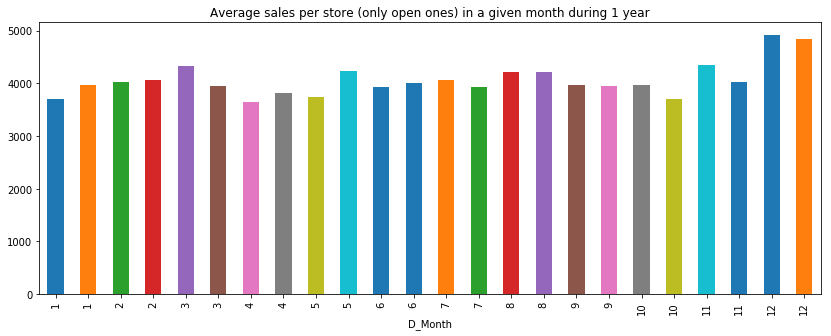

In [73]:
bothbymonth.plot('D_Month','Sales_per_store',figsize = (14,5),legend = 
                  False,title = 'Average sales per store (only open ones) in a given month during 1 year',kind='bar')
#data.plot('type', 'sale', kind='bar')

## Aggregation by day of month